<a href="https://colab.research.google.com/github/Vice10/ds_notebooks/blob/main/spotify_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spotipy 

In [ ]:
import requests

CLIENT_ID = 'd242d19a0a494dfe92a0d8ff270d621a'
CLIENT_SECRET = '956c83b6694045749a89c9637cb899e3'

AUTH_URL = 'https://accounts.spotify.com/api/token'

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2021', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])
        

In [ ]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Carolina Gaitán - La Gaita,We Don't Talk About Bruno,52xJxFP6TqMuO4Yt0eOkMz,96,29PgYEggDV3cDP9QYTogwv
1,Armin van Buuren,A State Of Trance (ASOT 1048) - Tune Of The Ye...,23uQosdt9K10pu3mtrQVWN,26,0SfsnGyD8FpIN4U4WCkBZ5
2,Coldplay,My Universe,3FeVmId7tL5YN8B7R3imoM,92,4gzpq5DPGxSnKTe4SA8HAU
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,65,4qmHkMxr6pTWh5Zo74odpH
4,Kodak Black,Super Gremlin,4A8cWXxKfIL3lAyUDzXbCF,91,46SHBwWsqBkxI7EeeBEQG7


In [ ]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [ ]:
track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Carolina Gaitán - La Gaita,We Don't Talk About Bruno,52xJxFP6TqMuO4Yt0eOkMz,96,29PgYEggDV3cDP9QYTogwv,81,[],15306
1,Armin van Buuren,A State Of Trance (ASOT 1048) - Tune Of The Ye...,23uQosdt9K10pu3mtrQVWN,26,0SfsnGyD8FpIN4U4WCkBZ5,78,"[dutch trance, edm, pop dance, progressive hou...",4049119
2,Coldplay,My Universe,3FeVmId7tL5YN8B7R3imoM,92,4gzpq5DPGxSnKTe4SA8HAU,92,"[permanent wave, pop]",33991472
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,65,4qmHkMxr6pTWh5Zo74odpH,60,"[art rock, classic rock, folk rock, mellow gol...",221266
4,Kodak Black,Super Gremlin,4A8cWXxKfIL3lAyUDzXbCF,91,46SHBwWsqBkxI7EeeBEQG7,86,"[florida rap, hip hop, melodic rap, miami hip ...",7751343


In [ ]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)

In [ ]:
print(track_features[0][0].keys())

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [ ]:
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [ ]:
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)

In [ ]:
tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.577,0.450,0,-8.516,0,0.0834,0.35700,0,0.1110,0.830,205.863,audio_features,52xJxFP6TqMuO4Yt0eOkMz,spotify:track:52xJxFP6TqMuO4Yt0eOkMz,https://api.spotify.com/v1/tracks/52xJxFP6TqMu...,https://api.spotify.com/v1/audio-analysis/52xJ...,216120,4
1,0.594,0.733,2,-6.669,1,0.3640,0.03090,0,0.0846,0.637,136.716,audio_features,23uQosdt9K10pu3mtrQVWN,spotify:track:23uQosdt9K10pu3mtrQVWN,https://api.spotify.com/v1/tracks/23uQosdt9K10...,https://api.spotify.com/v1/audio-analysis/23uQ...,39000,5
2,0.588,0.701,9,-6.390,1,0.0402,0.00813,0,0.2000,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,228000,4
3,0.645,0.809,11,-6.120,1,0.0385,0.00921,0.00108,0.1060,0.966,138.978,audio_features,3oyc1mIdCBGaU55wX7otqM,spotify:track:3oyc1mIdCBGaU55wX7otqM,https://api.spotify.com/v1/tracks/3oyc1mIdCBGa...,https://api.spotify.com/v1/audio-analysis/3oyc...,196680,4
4,0.825,0.414,2,-6.634,1,0.1440,0.00265,0,0.3570,0.106,72.993,audio_features,4A8cWXxKfIL3lAyUDzXbCF,spotify:track:4A8cWXxKfIL3lAyUDzXbCF,https://api.spotify.com/v1/tracks/4A8cWXxKfIL3...,https://api.spotify.com/v1/audio-analysis/4A8c...,200548,4


In [ ]:
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
#cols_to_drop1 = ['track_id','artist_id']
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
#track_df = track_df.drop(columns=cols_to_drop1)
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   loudness          1000 non-null   float64
 3   speechiness       1000 

In [ ]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      1000 non-null   float64 
 1   energy            1000 non-null   float64 
 2   loudness          1000 non-null   float64 
 3   speechi

### Show the most popular tracks/artists

In [ ]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)

,track_name,artist_name
12,abcdefu,GAYLE
16,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons
0,We Don't Talk About Bruno,Carolina Gaitán - La Gaita
28,STAY (with Justin Bieber),The Kid LAROI
88,Do It To It,ACRAZE
34,Easy On Me,Adele
48,Cold Heart - PNAU Remix,Elton John
20,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X
18,good 4 u,Olivia Rodrigo
54,Shivers,Ed Sheeran


In [ ]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
610,92235000,96,Ed Sheeran,"['pop', 'uk pop']"
938,75734709,94,Ariana Grande,"['dance pop', 'pop']"
872,60780542,98,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
970,56765265,93,Billie Eilish,"['art pop', 'electropop', 'pop']"
158,56422630,97,Justin Bieber,"['canadian pop', 'pop']"
668,48915764,98,Taylor Swift,['pop']
726,45361666,96,BTS,"['k-pop', 'k-pop boy group']"
104,43449365,99,Bad Bunny,"['latin', 'reggaeton', 'trap latino']"
112,41569867,100,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
16,38187964,93,Imagine Dragons,"['modern rock', 'rock']"


In [ ]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

progressive house       281
trance                  252
edm                     186
uplifting trance        184
progressive trance      182
pop dance               176
pop                     161
rap                     106
dutch trance             78
trap                     65
dance pop                56
hip hop                  55
melodic rap              47
contemporary country     43
rock                     34
chicago rap              32
art rock                 31
classic rock             31
mellow gold              31
folk rock                29
dtype: int64

### Top Genres

Text(0.5, 1.0, 'Top genres')

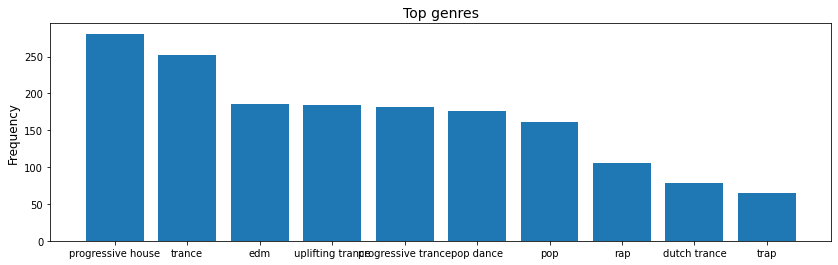

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

### Top 20 Artists(by followers) for each of top 10 genres

In [ ]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Armin van Buuren,progressive house
1,Tiësto,trance
2,Marshmello,edm
3,Above & Beyond,uplifting trance
4,Above & Beyond,progressive trance
5,Marshmello,pop dance
6,Ed Sheeran,pop
7,Drake,rap
8,Armin van Buuren,dutch trance
9,Lil Baby,trap


### Top 20 Songs(by track_popularity) for each of top 10 genres

In [ ]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Asylum (Mixed),49,Super8 & Tab,progressive house
1,The Motto,93,Tiësto,trance
2,Where Are You Now,94,Lost Frequencies,edm
3,Asylum (Mixed),49,Super8 & Tab,uplifting trance
4,Asylum (Mixed),49,Super8 & Tab,progressive trance
5,Where Are You Now,94,Lost Frequencies,pop dance
6,Easy On Me,96,Adele,pop
7,One Right Now (with The Weeknd),92,Post Malone,rap
8,Bloodstream (Mixed),49,Ferry Corsten,dutch trance
9,Super Gremlin,91,Kodak Black,trap


### Tracks' features analysis

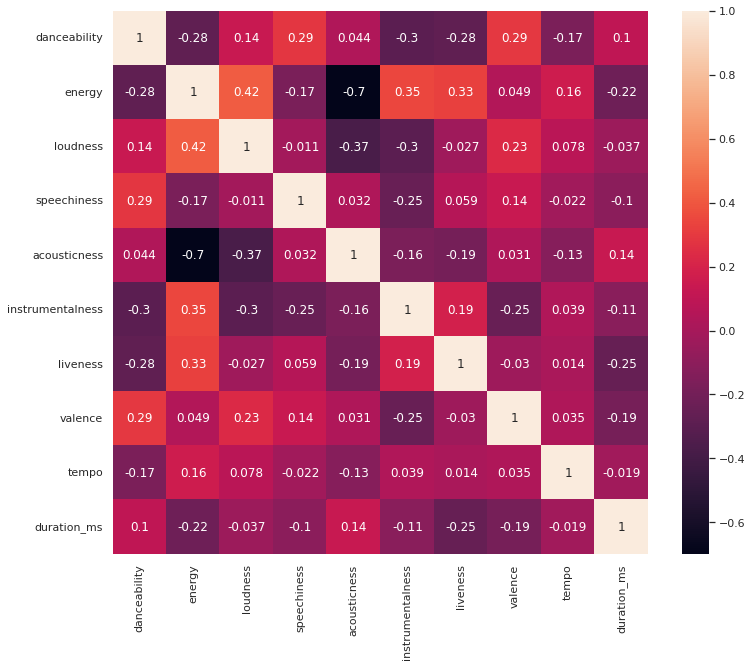

In [ ]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()

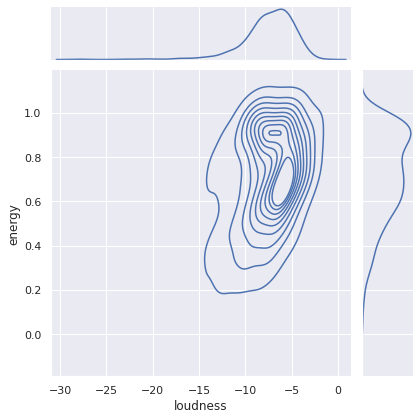

In [ ]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=tf_df, x="loudness", y="energy", kind="kde")

### Feature portrait of the most popular songs

In [ ]:
# TODO create a dataframe with features of top 100 songs
feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_feat = pd.DataFrame(columns=feat_cols)
for i, track in by_track_pop[:100].iterrows():
  features = tf_df[tf_df['id'] == track['track_id']]
  top_100_feat = top_100_feat.append(features, ignore_index=True)
top_100_feat = top_100_feat[feat_cols]

In [ ]:
from sklearn import preprocessing
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index=True)
mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)
mean_vals

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.661570,0.635350,0.095779,0.247145,0.008036,0.156145,0.515085
1,0.596516,0.707478,0.108348,0.174449,0.226238,0.238314,0.452037


In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

### Get track recommendations

In [ ]:
rec = sp.recommendations(seed_artists=["3PhoLpVuITZKcymswpck5b"], seed_genres=["pop"], seed_tracks=["1r9xUipOqoNwggBpENDsvJ"], limit=100)
for track in rec['tracks']:
  print(track['artists'][0]['name'], track['name'])

Meghan Trainor Me Too
Billy Joel My Life
Elton John Honky Cat
Kurt Hugo Schneider All Time Low
Pretenders Don't Get Me Wrong - 2007 Remaster
Bryson Tiller Don't
NEFFEX Are You Ok?
Supertramp Give A Little Bit
blackbear idfc
James Bay Let It Go
Kendrick Lamar LOYALTY. FEAT. RIHANNA.
Wings Live And Let Die - 2018 Remaster
Vicetone Nevada
Phil Collins Do You Remember? - 2016 Remaster
Sean Paul No Lie
Drake Too Good
The Neighbourhood Daddy Issues (Remix) feat. Syd
Yusuf / Cat Stevens The Wind - Remastered 2021
Ariana Grande Problem
Pentakill Lost Chapter
NateWantsToBattle Guren no Yumiya (Attack on Titan)
Maroon 5 Maps
Confetti Rob A Bank
Paramore Grudges
Justin Timberlake Say Something (feat. Chris Stapleton)
Seafret Atlantis
Elton John Pinball Wizard
Jax Jones You Don't Know Me
The Chainsmokers Closer
Wham! Everything She Wants
Imagine Dragons Wrecked
Billy Joel Piano Man
Kurt Hugo Schneider Sweater Weather
Silk City Electricity (with Dua Lipa)
K CAMP Comfortable
Crowded House Don't Drea